# LOCA2 move stuff

In [5]:
##########################################################
#
# Library Calls.
#

# loading numpy

import numpy             as np

# loading matplotlib

import matplotlib.pyplot as plt

# loading xarray

import xarray            as xr

# Loading pandas

import pandas            as pd

# Loading MetPy

import metpy             as metpy


# Loading Cartopy's Projection and 
#   Geospatial Dataset Plotting Features

import cartopy.crs       as ccrs
import cartopy.feature   as cfeature

def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (np.abs(dd_array - dd)).argmin()
   return geo_idx
#
##########################################################

In [6]:

#http://kyrill.ias.sdsmt.edu:8080/thredds/dodsC/LOCA2/Climate_CONUS/Monthly/historical/LOCA2-CONUS-ANNUAL_MIN___tasmin___GFDL-ESM4.r1i1p1f1___historical.nc


In [18]:
root_directory       = "http://kyrill.ias.sdsmt.edu:8080/thredds/dodsC/LOCA2/Climate_CONUS/Monthly"

loca2_infentory_file = "http://kyrill.ias.sdsmt.edu:8080/thredds/fileServer/LOCA2/Original_CONUS/LOCA2_Model_Member_Available_List.csv"

loca2_ensembles_list = pd.read_csv(filepath_or_buffer = loca2_infentory_file)

loca2_ensembles_list = loca2_ensembles_list.query('Rank == 1')

models               = loca2_ensembles_list[ "Model"].values
members              = loca2_ensembles_list["Member"].values
n_complete_enss      = loca2_ensembles_list["n_complete_ens"].values
historical_invs      = loca2_ensembles_list["historical"].values
ssp245_invs          = loca2_ensembles_list["ssp245"].values
ssp370_invs          = loca2_ensembles_list["ssp370"].values
ssp585_invs          = loca2_ensembles_list["ssp585"].values

prec_invs = loca2_ensembles_list["pr"].values
tmax_invs = loca2_ensembles_list["tasmax"].values
tmin_invs = loca2_ensembles_list["tasmin"].values

scenarios            = ["historical", 
                        "ssp245", 
                        "ssp370", 
                        "ssp585"]


display(loca2_ensembles_list)








,Model,Member,Var,Season,Stat,NetError,Rank,historical,ssp245,ssp370,ssp585,tasmax,tasmin,pr,n_complete_ens,n_avail_ens
0,GFDL-ESM4,r1i1p1f1,All,Annual,Both,6.152235,1,XNP,XNP,XNP,XNP,H235,H235,H235,4,4
1,BCC-CSM2-MR,r1i1p1f1,All,Annual,Both,6.357673,1,XNP,XNP,XNP,XNP,H235,H235,H235,4,4
2,GFDL-CM4,r1i1p1f1,All,Annual,Both,6.498461,1,XNP,XNP,---,XNP,H2-5,H2-5,H2-5,3,3
3,CNRM-CM6-1,r1i1p1f2,All,Annual,Both,6.513064,1,XNP,XNP,XNP,XNP,H235,H235,H235,4,4
4,TaiESM1,r1i1p1f1,All,Annual,Both,6.658829,1,XNP,XNP,XNP,---,H23-,H23-,H23-,3,3
5,CNRM-ESM2-1,r1i1p1f2,All,Annual,Both,6.681317,1,XNP,XNP,XNP,XNP,H235,H235,H235,4,4
6,CNRM-CM6-1-HR,r1i1p1f2,All,Annual,Both,6.990708,1,XNP,---,---,XNP,H--5,H--5,H--5,2,2
7,INM-CM4-8,r1i1p1f1,All,Annual,Both,7.238094,1,XNP,XNP,XNP,XNP,H235,H235,H235,4,4
8,MIROC6,r1i1p1f1,All,Annual,Both,8.165782,1,XNP,XNP,XNP,XNP,H235,H235,H235,4,4
9,MRI-ESM2-0,r5i1p1f1,All,Annual,Both,9.399468,1,XNP,---,XNP,---,H-3-,H-3-,H-3-,2,2


In [24]:
loca2_ensembles_list.tasmin.str.contains("3").sum()

20

In [29]:


m = 0


model          =          models[m]
member         =         members[m]

n_complete_ens = n_complete_enss[m]
prec_inv       =     prec_invs[m]
tmax_inv       =     tmax_invs[m]
tmin_inv       =     tmin_invs[m]

file_url_h = root_directory + "/" + scenario + "/LOCA2-CONUS-ANNUAL_MIN___tasmin___" + model + "." + member + "___" + scenarios[0] + ".nc"

if ("3" in tmin_inv):
    print("we have three")







we have three


In [14]:


dsh = xr.open_dataset(filename_or_obj = file_url_h)

##########################################################
# 
# Parsing our dataset geospatial address system into a 
#     more CF-Friendly environment.
#

dsh = dsh.metpy.parse_cf()

display(dsh)

#
##########################################################

display(dsh.metpy_crs.metpy.cartopy_crs)
data_crs = dsh.metpy_crs.metpy.cartopy_crs

lat  = dsh["lat"]
lon  = dsh["lon"]





<xarray.Dataset>
Dimensions:    (lat: 474, bnds: 2, time: 65, lon: 944)
Coordinates:
  * lat        (lat) float32 23.91 23.97 24.03 24.09 ... 53.28 53.34 53.41 53.47
  * time       (time) datetime64[ns] 1950-07-02T12:00:00 ... 2014-07-02T12:00:00
  * lon        (lon) float32 234.5 234.6 234.7 234.7 ... 293.3 293.3 293.4 293.5
    metpy_crs  object Projection: latitude_longitude
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (lat, bnds) float32 ...
    time_bnds  (time, bnds) datetime64[ns] ...
    lon_bnds   (lon, bnds) float32 ...
    tasmin     (time, lat, lon) float32 ...
Attributes: (12/13)
    CDI:                             Climate Data Interface version 2.0.6 (ht...
    Conventions:                     CF-1.6
    _NCProperties:                   version=2,netcdf=4.8.1,hdf5=1.12.2
    title:                           LOCA statistically downscaled climate mo...
    author:                          David W. Pierce, Scripps Institution of ...
    experiment_id:                   historical
    ...                              ...
    model_variant_id:                r1i1p1f1
    history:                         Sat Nov 25 06:27:49 2023: ncks -v tasmin...
    NCO:                             netCDF Operators version 5.1.1-alpha06 (...
    frequency:                       year
    CDO:                             Climate Data Operators version 2.0.6 (ht...
    DODS_EXTRA.Unlimited_Dimension:  time

<Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
tasmin_avg = dsh["tasmin"][0,:,:]

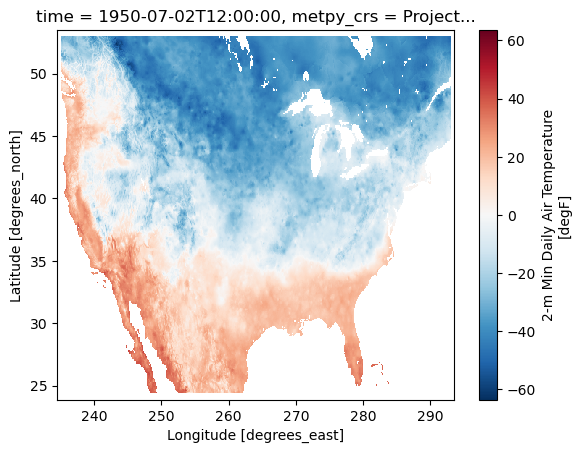

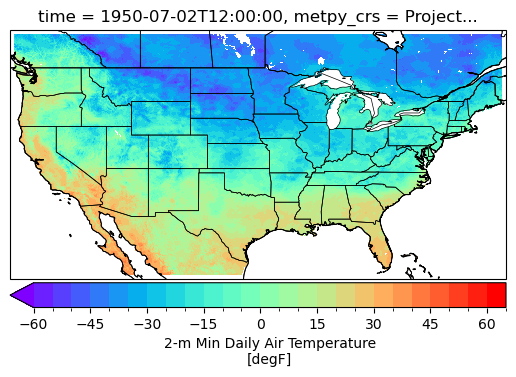

In [17]:
###################################################
#
# Integrating a projection data to our image data.
#

# make a figure space 

fig = plt.figure()

# add a plot element just one field

                   # nrows, ncols, index [which oddly starts with one (go fig)],
ax = fig.add_subplot(    1,     1,     1, 
                     projection = data_crs)

#ax.set_extent((lon.min(), lon.max(), lat.min(), lat.max()))

# of you use the coastlines and add_feature you can see it does 
#   the full cone and our place on it


ax.coastlines(resolution = 'auto',
              linewidths =  0.75)

t2m_degF_levels = np.arange(start = -60,
                            stop  =  70,
                            step  =  5)

contour = tasmin_degF_avg.plot(cmap          = plt.cm.rainbow, 
                               levels        = t2m_degF_levels,
                               cbar_kwargs   = {"orientation" : "horizontal", 
                                                "pad":.01})



ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
 
#ax.gridlines(draw_labels=True)

# here is our plot from above.

# and pow this will give us our mapping.

# Let's overlay our pressure contours.




plt.show()

#
###################################################